In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from keras.models import Sequential
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="1"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/21_category/224/5k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 905.5622770786285 seconds


In [3]:
len(X_train)

94500

In [4]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/21_category/224/5k/X_validate.npy')
print('Loading X_test...')
X_test = np.load('/home/zxt/data/21_category/224/5k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/21_category/224/5k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/21_category/224/5k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/21_category/224/5k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 100.91617321968079 seconds


In [5]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (94500, 224, 224, 3)
94500 train samples
5250 validate samples
5250 test samples


In [6]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [7]:

# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

In [8]:
# one-hot encoder[only accpet int]
y_train=np_utils.to_categorical(Y_train,21)
y_validate=np_utils.to_categorical(Y_validate,21)
y_test=np_utils.to_categorical(Y_test,21)

In [9]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 2.Model structure

In [10]:
def alexnet_s(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    #s: add two more layers to train
    x = Dropout(0.4)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(4096, activation='relu')(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [11]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [12]:
from keras.callbacks import Callback
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3.Modeling

In [13]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 40
n_classes = 21
input_shape = 224,224,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [14]:
K.clear_session()
# model = alexnet(input_shape, n_classes)
model = alexnet_s(input_shape,n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [16]:
num_classes = 21
f1_metrics = Metrics()

In [18]:
# Data augmentation

image_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.6,1),
    fill_mode="nearest")

image_datagen.fit(X_train, augment=True)

In [17]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping,f1_metrics],
    validation_data = (X_validate,y_validate))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 94500 samples, validate on 5250 samples
Epoch 1/40
94500/94500 [==============================] - 473s 5ms/step - loss: 1.4724 - accuracy: 0.4911 - val_loss: 1.0762 - val_accuracy: 0.6290
val_f1: 0.6102 - val_precision: 0.6369 - val_recall: 0.6306
Epoch 2/40
94500/94500 [==============================] - 443s 5ms/step - loss: 0.9580 - accuracy: 0.6650 - val_loss: 0.8188 - val_accuracy: 0.7139
val_f1: 0.7074 - val_precision: 0.7181 - val_recall: 0.7153
Epoch 3/40
94500/94500 [==============================] - 443s 5ms/step - loss: 0.7434 - accuracy: 0.7424 - val_loss: 0.7884 - val_accuracy: 0.7280
val_f1: 0.7246 - val_precision: 0.7476 - val_recall: 0.7278
Epoch 4/40
94500/94500 [==============================] - 443s 5ms/step - loss: 0.6010 - accuracy: 0.7929 - val_loss: 0.7018 - val_accuracy: 0.7568
val_f1: 0.7587 - val_precision: 0.7848 - val_recall: 0.7533
Epoch 5/40
94500/94500 [==============================] - 442s 5ms/step - loss: 0.4838 - accuracy: 0.

In [30]:
# parallel_model.save('/home/zxt/data/model/alex_basic_5k_224.h5')

In [19]:
model.save('/home/zxt/data/model/pre_final/alexnet_s_lr_5k_224_model.h5')

In [18]:
model.save_weights('/home/zxt/data/model/pre_final/alexnet_s_lr_5k_224_modelweights.h5')

### 4.Evaluation

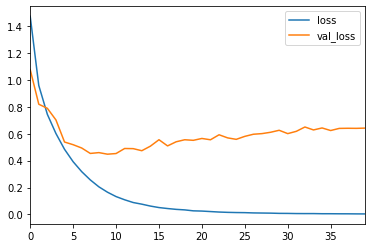

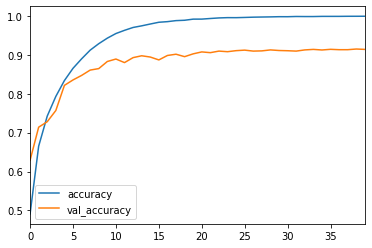

In [21]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [22]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

5250/5250 [==============================] - 11s 2ms/step

test loss 0.6121435704146113
accuracy 0.914476215839386


In [23]:
y_pred = model.predict(X_test,batch_size=1)

In [24]:
y_pred

array([[4.39944611e-17, 2.45617650e-14, 1.87593965e-20, ...,
        5.41113446e-20, 1.29389246e-17, 3.31867244e-17],
       [2.14711437e-17, 2.36130831e-13, 4.37362868e-16, ...,
        8.77714731e-19, 8.98858708e-18, 8.12236056e-09],
       [6.35984277e-12, 7.11188400e-11, 8.87984825e-11, ...,
        2.98422121e-13, 2.73077183e-09, 6.46601772e-10],
       ...,
       [6.95694431e-17, 7.46970506e-14, 1.94558422e-18, ...,
        8.78506717e-20, 2.31219186e-19, 1.04906970e-14],
       [9.64880112e-16, 1.47139923e-14, 2.08265999e-16, ...,
        1.06317330e-19, 3.79081922e-12, 2.63901458e-15],
       [2.54233604e-16, 4.24140193e-12, 7.55256182e-14, ...,
        1.19923787e-18, 7.64593009e-15, 8.34581032e-02]], dtype=float32)

In [25]:
len(y_pred)

5250

### 6.Check each categoryaccuracy

In [26]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [27]:
y_prediction[:5]

[13, 7, 12, 2, 0]

In [28]:
Y_test[:5]

array([['13'],
       ['7'],
       ['12'],
       ['2'],
       ['0']], dtype='<U16')

In [29]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [30]:
y_real.head(2)

,label
0,13
1,7


In [31]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [32]:

y_predict.head(2)

,label_pre
0,13
1,7


In [33]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [34]:
prediction_df

,label,label_pre,diff
0,13,13,0
1,7,7,0
2,12,12,0
3,2,2,0
4,0,0,0
...,...,...,...
5245,12,12,0
5246,11,11,0
5247,15,15,0
5248,13,13,0


In [35]:
prediction_df.to_csv(r'/home/zxt/data/results/prediction_df_5k_alex_s.csv',index=False)

In [36]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )

elephant acc:      0.849
wild_boar acc:      0.826
gazellethomosons acc:      0.953
squirrel acc:      0.952
hedgehog acc:      0.996
guineafowl acc:      0.968
moose acc:      0.989
coyote acc:      0.927
bird acc:      0.890
fox acc:      0.923
giraffe acc:      0.948
buffalo acc:      0.858
hare acc:      0.966
vehicle acc:      0.958
wildebeest acc:      0.822
cattle acc:      0.758
skunk acc:      0.953
lion acc:      0.872
zebra acc:      0.873
black_bear acc:      0.923
racoon acc:      0.961
